<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/Part_04_%ED%95%A9%EC%84%B1%EA%B3%B1_%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 04. 합성곱 신경망 (CNN)**

##**01. 합성곱 신경망**
CNN : Convolutional Neural Network, 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용. 이미지 분류, 객체 탐지, 스타일 전이 등.

ex. 모델이 강아지 vs. 고양이 이미지를 인식할 수 있는 능력을 갖추게 된다. 또는 이미지에서 특정 개체를 인식하고 이미지의 어디에 있는지 위치까지 파악. 또는 콘텐츠 이미지와 스타일 참조 이미지를 이용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀 새로운 이미지를 생성하는 기술.

###1-1. 이미지 표현
이미지를 컴퓨터가 이해할 수 있게 숫자로 표현해야한다. 컬러 이미지는 RGB 채널로 구성된 3장의 이미지를 겹쳐서 표현. 마찬가지로 0~255.

###1-2. 합성곱 (Convolution)
입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널을 사용해 입력 이미지에 대한 특성을 추출하는 방법. 합성곱 연산을 통해 추출된 이미지를 **특성맵**이라고 부른다.

이미지에 필터를 적용하는 합성곱 연산. 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영해준다. 입력 이미지와 커널이 겹치는 부분에 대해 합성곱 연산을 수행.

ex. 커널 사이즈가 3*3인 경우 총 9개의 가중치를 가지며 오차 역전파 시 커널의 가중치를 업데이트한다. 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치 때문. 오차 역전파 시 커널의 그래디언트를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층보다 연산량 적어진다.

###1-3. 채널
이미지를 구성하는 2차원 배열의 개수. ex. 흑백 이미지는 단일 채널, 컬러 이미지는 R, G, B 3개의 채널.

이렇게 여러 개의 채널을 갖는 경우, 합성곱 연산을 수행할 때 특성맵의 생성 과정을 살펴보자. 입력 이미지의 채널 개수만큼 커널이 생성, 각 채널마다 하나씩 커널을 적용해 합성곱 연산을 수행. 입력 이미지의 채널 개수만큼 결과가 생성되므로 element-wise 덧셈 연산으로 더해주면 최종 특성맵 완성.

합성곱 레이어에 출력 필터의 개수를 20개로 설정했다면, 입력 이미지의 채널 개수 3개와 필터의 개수 20개가 곱해져 총 60개 커널 생성. 

###1-4. 스트라이드 (stride)
커널은 좌측 상단부터 입력 이미지를 기준으로 우측으로 이동하며 합성곱 연산을 계속한다. 이때 이동하는 간격을 스트라이드라고 하며 주로 1, 2로 설정. 스트라이드를 2로 설정하면 당연히 특성맵 크기가 1/2로 줄어든다. Conv2D 레이어의 strides 변수에 스트라이드 지정.

###1-5. 패딩
커널 크기가 3*3, 스트라이드에서 1로 설정해도 추출된 특성맵의 사이즈는 입력 이미지 대배 가로로 2, 세로로 2씩 줄어들게 된다. 하지만 크기 줄어들지 않도록 패딩을 설정할 수 있다.

일반적으로 zero-padding을 사용하는데, 그럼 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출한다. Covn2D 레이어에서 padding='same'으로 설정.

###1-6. 특성맵 (feature map) 사이즈
패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식이 있다.

(Output Height, Output Width)=(Image Height + 2P - Kernel Height)/s + 1, Image Width + 2P - Kernel Height)/s + 1

###1-7. 풀링
풀링 레이어는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어. 연산량 감소, 과대적합 방지.

* 최대 풀링 : 값이 큰 값이 다른 특징들을 대표한다.
* 평균 풀링

최대 풀링 수행 시 커널의 크기가 2*2로 주어질 때 입력 이미지의 2*2 픽셀 중 최대값이 출력 값으로 선택. 평균 풀링은 평균 값.

풀링 레이어도 역시 스트라이드 값을 가지며 스트라이드를 2로 설정하면 2칸씩 건너뛰며 풀링을 수행.

##**02. 간단한 모델 생성**
MNIST 데이터로 간단한 구조의 합성곱 신경망 모델을 만들어보자.

###2-1. 데이터 로드 및 전처리

In [ ]:
# tensorflow 모듈 import
import tensorflow as tf

훈련 세트와 검증 세트로 구분해 튜플 형태로 정리해준다.

In [ ]:
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


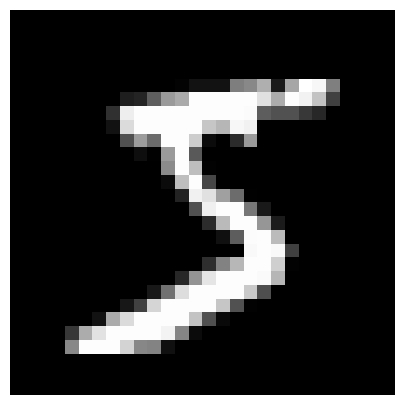

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


역시 0~255 값.

In [ ]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


mnist 데이터셋은 색상을 나타내는 채널이 1개. CNN 모델에 주입하기 위해 색상을 나타내는 채널을 추가해주자.

tf.newaxis 축을 텐서 배열에 직접 추가하는 방식을 통해 (60000, 28, 28) -> (60000, 28, 28, 1)로 변환하자. [] 안에서 추가하고자 하는 위치에 작성하면 된다.

In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in=x_train[..., tf.newaxis]
x_valid_in=x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


###2-2. Sequential API로 모델 생성 및 학습
sequential api로 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델을 만들자.

In [ ]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    #max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

앞서 정의한 모델 구조에 손실함수, 옵티마이저, 평가지표를 설정해주고 컴파일하면 모델 인스턴스가 생성된다. fit 해보자.

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2174 - accuracy: 0.9377 - val_loss: 0.0871 - val_accuracy: 0.9736
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0803 - accuracy: 0.9772 - val_loss: 0.0685 - val_accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0593 - accuracy: 0.9825 - val_loss: 0.0579 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0489 - accuracy: 0.9851 - val_loss: 0.0584 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.0519 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0508 - val_accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0513 -

In [ ]:
# evaluate도 하자
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0606 - accuracy: 0.9830


[0.06056147441267967, 0.9829999804496765]

훈련 결과를 history에 저장했다. epoch동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수를 정의하고 실행하자.

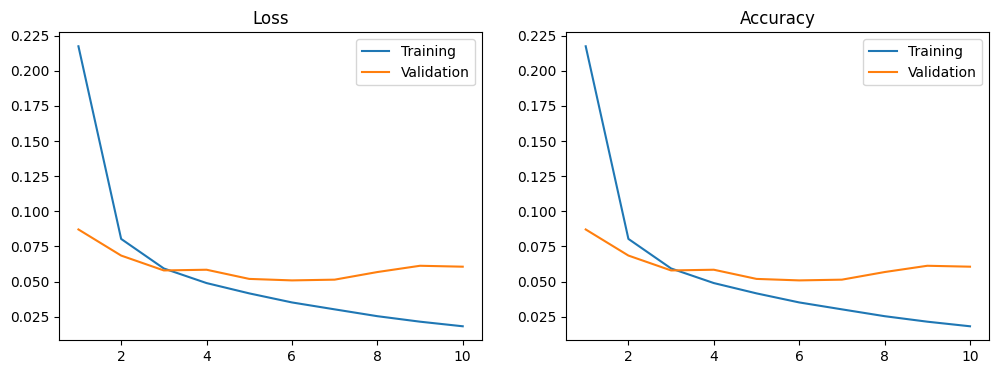

In [ ]:
def plot_loss_acc(history, epoch):
  loss, val_loss=history.history['loss'], history.history['val_loss']
  acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

  fig, axes=plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

4 epoch 이후부터는 과대적합.

###2-3. 모델 구조 파악
summary()

(28, 28, 1) 형태의 입력 텐서가 Conv2D를 거치며 (26, 26, 32) 형태로 변환된다. 3*3 크기의 합성곱 필터를 사용하기 때문에 이미지의 가로, 세로가 2씩 줄고 서로 다른 32개의 필터를 사용했다. 2*2 크기의 풀링 레이어를 적용하면 이미지가 1/2로 줄어든다. 따라서 풀링 레이어를 거치면 (13, 13, 32) 텐서로 변환되고 flatten 층에서 1차원으로 펼치면 5408개 (13*13*32) 원소를 갖는 벡터가 된다.

In [ ]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서를 추출할 수 있다. (None, 28, 28, 1) 형태에서 none은 배치 크기가 들어오는 위치로 어떤 값이든 가능하다는 의미.

In [ ]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

10개의 노드를 갖는 1차원 벡터 형태.

모델을 구성하는 레이어를 추출하려면 layers 속성 확인.

In [ ]:
# 레이어
model.layers

우리가 작성한 모델은 4개의 레이어로 구성된다. 첫번째 레이어를 선택해보자.

In [ ]:
# 첫 번째 레이어 선택
model.layers[0]

각 레이어에 입력되는 텐서를 따로 선택하는 것도 가능. 앞의 Conv2D 레이어에는 모델의 입력 데이터가 그대로 들어가기 때문에 (None, 28, 28, 1) 형태.

In [ ]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

마찬가지로 각 레이어에서 출력되는 텐서를 확인할 수 있다. Conv2D 레이어를 거치면 픽셀 사이즈가 2씩 줄어들고 채널 개수가 32개로 늘어나면서 (None, 26, 26, 32) 형태가 된다.

In [ ]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

각 레이어의 가중치 행렬을 추출할 수 있다. weights 속성을 적용.

In [ ]:
# 첫 번재 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 3.76772225e-01,  2.56770641e-01, -4.63932127e-01,
           -2.18091160e-02, -2.68836588e-01, -1.71760857e-01,
            3.04087698e-01, -2.49406680e-01, -3.17424595e-01,
           -1.43411770e-01, -1.24447393e+00, -8.94081146e-02,
           -2.80764401e-01, -7.71416306e-01,  4.34575319e-01,
            5.56230322e-02,  9.32297390e-03,  3.35544586e-01,
           -2.09393017e-02,  1.78533643e-01, -8.56455639e-02,
           -1.36574185e+00,  4.80307460e-01,  8.47059488e-02,
            4.17831928e-01, -1.01862185e-01,  1.22288994e-01,
            2.33635530e-01, -1.37143743e+00,  2.61816084e-01,
           -9.12047386e-01, -6.39507473e-01]],
 
         [[-1.29847884e-01, -9.03746579e-03, -2.34834030e-01,
           -2.97292322e-02,  3.87319237e-01,  6.00860268e-02,
            3.10665667e-01, -6.41156614e-01, -2.22684875e-01,
           -5.52413821e-01, -1.02826047e+00,  4.92836356e-01,
           

커널 행렬의 가중치와 상수항(bias)를 나타낸다.

커널 가중치의 shape이 (3, 3, 1, 32). 3*3은 필터의 크기, 1은 입력층의 채널 개수, 32는 출력층의 채널 개수를 나타낸다.

커널 행렬의 가중치 또는 상수항을 따로 선택할 수도 있다.

In [ ]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 3.76772225e-01,  2.56770641e-01, -4.63932127e-01,
          -2.18091160e-02, -2.68836588e-01, -1.71760857e-01,
           3.04087698e-01, -2.49406680e-01, -3.17424595e-01,
          -1.43411770e-01, -1.24447393e+00, -8.94081146e-02,
          -2.80764401e-01, -7.71416306e-01,  4.34575319e-01,
           5.56230322e-02,  9.32297390e-03,  3.35544586e-01,
          -2.09393017e-02,  1.78533643e-01, -8.56455639e-02,
          -1.36574185e+00,  4.80307460e-01,  8.47059488e-02,
           4.17831928e-01, -1.01862185e-01,  1.22288994e-01,
           2.33635530e-01, -1.37143743e+00,  2.61816084e-01,
          -9.12047386e-01, -6.39507473e-01]],

        [[-1.29847884e-01, -9.03746579e-03, -2.34834030e-01,
          -2.97292322e-02,  3.87319237e-01,  6.00860268e-02,
           3.10665667e-01, -6.41156614e-01, -2.22684875e-01,
          -5.52413821e-01, -1.02826047e+00,  4.92836356e-01,
           2.08434924e-01,  

In [ ]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.34817824, -0.30136055, -0.08011903,  0.        , -0.17766988,
        0.00114025, -0.27497163, -0.11506984, -0.06313325, -0.11591193,
        0.25094992, -0.00164778, -0.11258385, -0.05220177, -0.09638   ,
       -0.14525369, -0.10078362, -0.37836877, -0.13224742, -0.11644476,
       -0.03034931, -0.0562587 , -0.01140511, -0.22928871, -0.40086886,
       -0.05202711, -0.1661043 , -0.25856745, -0.00333471, -0.35187185,
       -0.02377046, -0.1299917 ], dtype=float32)>

레이어의 이름을 사용해 해당 레이어를 선택할수도 있다.

In [ ]:
# 레이어 이름 사용해 레이어 선택
model.get_layer('conv')

모델에 입력 데이터 넣고, 모델의 첫번째와 두번째 레이어의 출력을 최종 출력으로 갖는 activator 모델을 정의한다. 첫번재 샘플에 대해 각 레이어의 출력을 예측한다.

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator=tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 79ms/step


2

2개의 출력 텐서 중 첫번째 텐서는 Conv2D 레이어의 출력.

In [ ]:
# 첫 번재 레이어 conv의 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

여기서 1은 입력 이미지의 개수.

첫번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분해 시각화하면 다음과 같다.

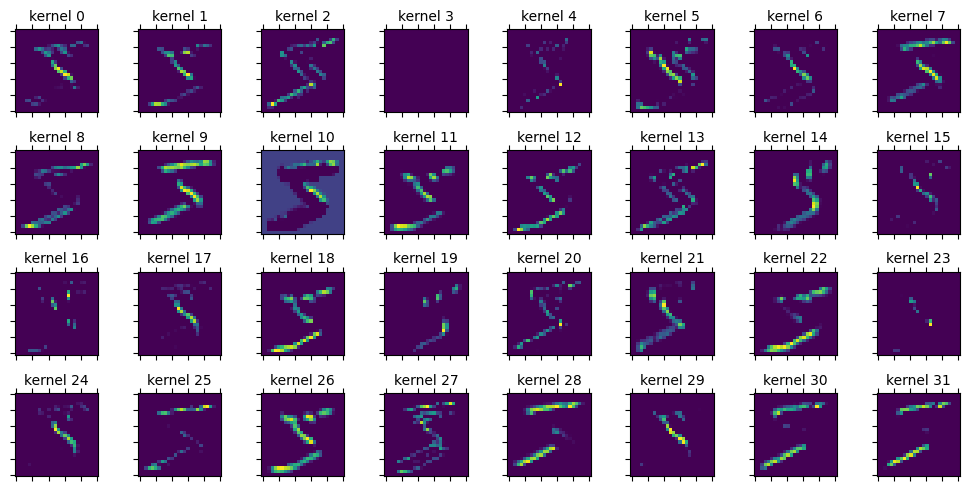

In [ ]:
# Convolution 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()
  

두번째 레이어는 최대 풀링 레이어. 여기서 출력하는 텐서는 (1, 13, 13, 32) 형태.

In [ ]:
# 두번째 레이어 pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


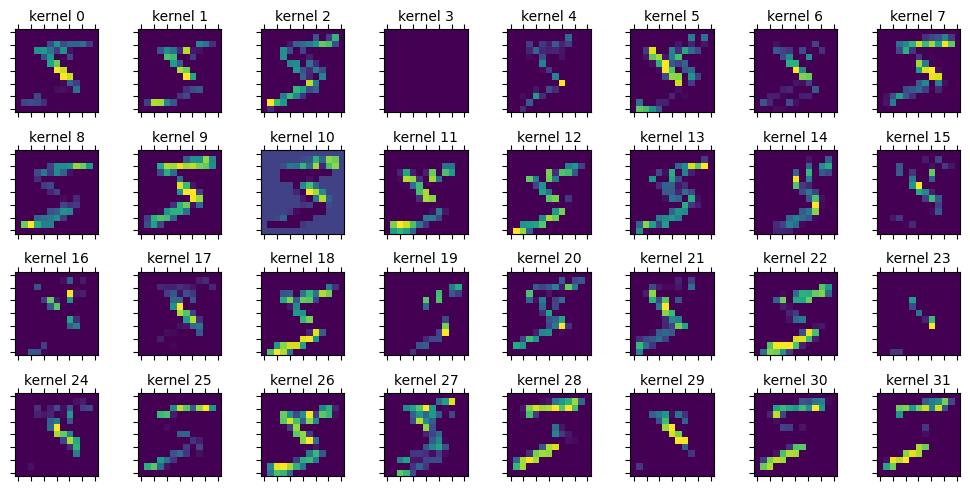

In [ ]:
# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

커널별로 출력되는 특성맵 이미지를 시각화하면, 앞 이미지보다 화소가 굵어짐.
* 최대 풀링 -> 인근 픽셀 모아 최대값으로 고정하기 때문에 픽셀 수를 줄이며 특징을 강하게 드러낸다.

##**03. 복잡한 모델 생성**
functional API 사용해 복잡한 구조의 모델을 정의해서 사용해보자. ex. 각 레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델, 중간 레이어를 건너뛰고 뒤쪽에 있는 레이어로 출력 텐서를 전달하는 방식의 직접 연결.


###3-1. 데이터셋 준비

In [1]:
import tensorflow as tf
import numpy as np

#mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


원본 정답 외에 홀수인지 짝수인지 판단하는 정답 (y_odd)를 추가하기로 하자.

In [2]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [3]:
# 잘 정리되었다
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


검증 데이터셋에도 만들어준다.

In [4]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

입력 이미지 데이터를 255로 나눠서 정규화한다. 또한 모노 컬러 이미지므로 새로운 축을 추가해 채널 개수를 1로 지정. expand_dims() 함수에 -1로 맨 끝에 새로운 축을 추가하도록 함.

In [6]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


###3-2. Functional API로 다중 입력, 다중 출력 레이어 생성
sequential api는 레이어를 층층이 한 줄로 연결할 수밖에 없지만, functional api를 사용하면 다중 입력 또는 다중 출력 같은 구조를 만들 수 있다.

아래 코드에서 입력 레이어 input의 경우 Conv2D 레이어와 flatten 레이어의 입력으로 사용된다. 따라서 입력 레이어는 2개의 출력을 갖고 각 출력은 각각 다른 레이어의 입력으로 사용된다. 최종적으로 Concatenate 레이어에서 합쳐진 다음 Dense 레이어를 통과한다. 이렇게 함수의 입력과 출력으로 표현할 수 있어서 자유롭게 모델 구조를 정의할 수 있다.

In [9]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 26, 26, 32)   320         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_2[0][0]']               
                                                                                                  
 flatten_3 (Flatten)            (None, 5408)         0           ['max_pooling2d_2[0][0]']        
                                                                                              

plot_model 함수를 사용하고 모델을 입력해 모델 구조를 그려보자. 입력 레이어가 2개의 출력으로 나뉘고 마지막 dense 레이어를 통과하기 전에 concatenate 레이어에서 하나로 합쳐지고 있다.

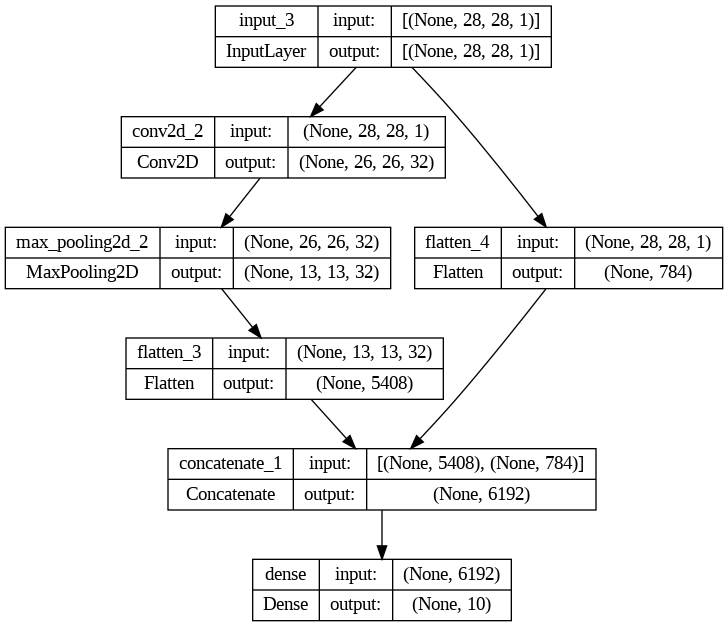

In [17]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

컴파일, 훈련, 성능 평가를 진행하자.

In [18]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 1.0181 - accuracy: 0.7571 - val_loss: 0.4419 - val_accuracy: 0.8795
Epoch 2/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.3961 - accuracy: 0.8856 - val_loss: 0.3392 - val_accuracy: 0.9040
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3410 - accuracy: 0.9000 - val_loss: 0.3107 - val_accuracy: 0.9103
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3197 - accuracy: 0.9066 - val_loss: 0.3020 - val_accuracy: 0.9135
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3072 - accuracy: 0.9104 - val_loss: 0.2888 - val_accuracy: 0.9163
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2989 - accuracy: 0.9132 - val_loss: 0.2846 - val_accuracy: 0.9167
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2921 - accuracy: 0.9154 - val_loss: 0.2790 -

###3-3. 다중 출력 분류 모델
이번에는 두 가지 서로 다른 분류 문제를 예측하는 다중 출력 모델을 만들어보자. 앞에 만든 짝수, 홀수 정답 배열 사용. 0~9 숫자를 맞추고, 홀짝을 맞추는 분류 문제를 동시에 풀어내는 모델의 정의해보자. **출력 레이어가 2개**인 것이 핵심.

In [19]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

모델 입력 텐서와 출력 텐서를 화면에 표시하자. 입력은 하나이고 출력은 10개인 텐서와 1개인 텐서로 두 개가 확인된다.

In [20]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


구조 그려보자.

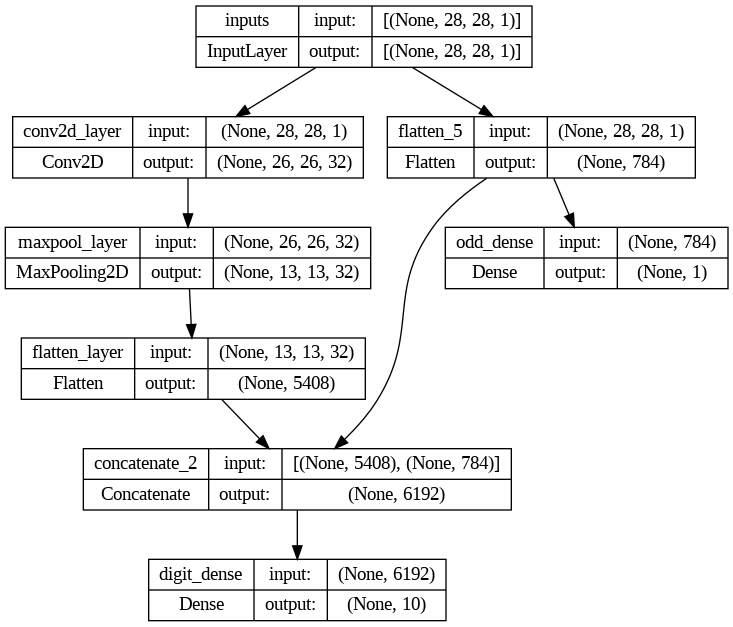

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

컴파일, 훈련, 성능 평가를 해보자. 주의할 점은 앞에서 모델 정의할 때 각각의 출력 Dense 레이어에 name 속성으로 이름을 지정했다. 여기서 지정한 이름을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 저장한다.

fit을 적용할 때도 출력 값을 2개 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야함.

In [22]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 1.3933 - digit_dense_loss: 1.0588 - odd_dense_loss: 0.6690 - digit_dense_accuracy: 0.7600 - odd_dense_accuracy: 0.7834 - val_loss: 0.7864 - val_digit_dense_loss: 0.4639 - val_odd_dense_loss: 0.6450 - val_digit_dense_accuracy: 0.8751 - val_odd_dense_accuracy: 0.7902
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.7232 - digit_dense_loss: 0.4098 - odd_dense_loss: 0.6268 - digit_dense_accuracy: 0.8824 - odd_dense_accuracy: 0.7959 - val_loss: 0.6540 - val_digit_dense_loss: 0.3512 - val_odd_dense_loss: 0.6054 - val_digit_dense_accuracy: 0.8995 - val_odd_dense_accuracy: 0.8000
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.6439 - digit_dense_loss: 0.3482 - odd_dense_loss: 0.5914 - digit_dense_accuracy: 0.8976 - odd_dense_accuracy: 0.8011 - val_loss: 0.6027 - val_digit_dense_loss: 0.3166 - val_odd_dense_loss: 0.5721 - val_digit_dense_accuracy: 0.9087 -

[0.4960440397262573,
 0.2751605808734894,
 0.4417668879032135,
 0.920799970626831,
 0.8269000053405762]

숫자 맞추기는 92% 정확도, 홀수 여부 판단은 83%의 정확도를 보인다. 홀수 여부를 판단하는 분류기에 레이어를 더 추가해 예측 정확도를 높일 여지가 있다.

검증 데이터셋의 인덱스 0에 해당하는 이미지를 출력해보자.

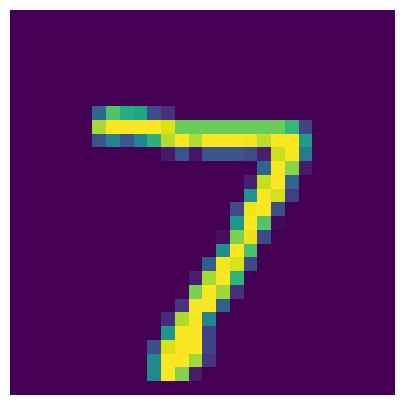

In [23]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

검증 데이터셋의 모든 이미지 데이터를 입력해 2개 분류 문제에 대한 예측 확률을 구해보자.

In [24]:
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 6ms/step
[7.8696866e-07 2.7554759e-11 1.4166234e-06 2.9695133e-04 1.2436523e-07
 3.0541341e-06 5.6136599e-11 9.9940908e-01 5.5053499e-07 2.8786011e-04]
[0.8220398]


첫번째 예측 값은 10개 분류 레이블에 대한 확률, 두번째 예측 값을 홀수일 확률.

넘파이를 이용해 예측 확률을 실제 정답 레이블로 변환하자.

In [25]:
digit_labels=np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

홀짝 여부에 대한 예측 레이블을 출력해보자. 임계값을 0.5로 지정.

In [26]:
odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-26-b68f671b10f9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1])

첫번째 이미지 7에 대해 홀수로, 두번째 이미지 2에 대해 짝수로 잘 분류하고 있다.

###3-4. 전이 학습
앞에서 훈련한 모델 일부를 가져와 최종 출력층만 새롭게 추가해 모델을 재구성할 수 있다. 이처럼 기존에 학습된 모델을 사용해 새로운 모델을 만드는 것을 Transfer Learning 이라고 한다. (base 층을 재사용해 Top 층을 변경)

앞에서 학습한 모델에서 입력 레이어부터 flatten_layer라는 name을 갖는 Flatten 층까지 해당하는 부분을 따로 추출해 base_model로 만든다. 모델 개요를 보면 (28, 28, 1) 이미지 받아 5408개의 피처로 특징을 추출해 출력하는 모델이다.

In [28]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


시각화하면 이해가 쉽다.

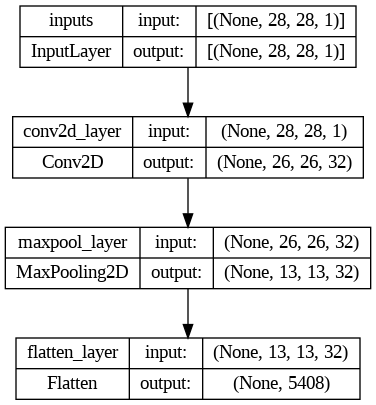

In [29]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

sequential api를 사용해 앞에서 정의한 base_model 레이어를 추가하고, 최종 분류기 역할을 하는 dense 레이어를 새롭게 이어 추가한다.

In [30]:
# Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


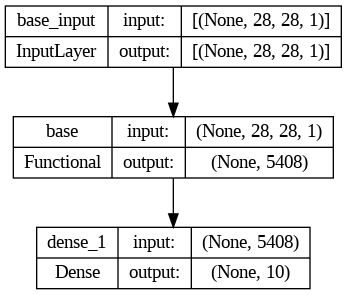

In [31]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

구조를 보니 최종적으로 노드 10개를 가진 분류기 역할을 하는 Dense 레이어가 추가되었다.

컴파일, 훈련하자.

In [32]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.6557 - accuracy: 0.8460 - val_loss: 0.3669 - val_accuracy: 0.8990
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3469 - accuracy: 0.8999 - val_loss: 0.3141 - val_accuracy: 0.9117
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3133 - accuracy: 0.9087 - val_loss: 0.2903 - val_accuracy: 0.9145
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3000 - accuracy: 0.9129 - val_loss: 0.2814 - val_accuracy: 0.9153
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2912 - accuracy: 0.9151 - val_loss: 0.2761 - val_accuracy: 0.9203
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2858 - accuracy: 0.9169 - val_loss: 0.2774 - val_accuracy: 0.9205
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2818 - accuracy: 0.9186 - val_loss: 0.2735 -

약 92% 정확도.

모델 인스턴스는 trainable 속성을 갖는다. 이 속성을 False로 지정하면 모델의 파라미터 값이 고정되어 업데이트되지 않는다. 이런 방식으로 base_model_frozen을 구성하자. 그럼 훈련 가능한 파라미터 개수가 0.

* Freeze Model

In [33]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


이번에는 파라미터를 고정한 base_model_input과 새로운 분류기 dense 레이어를 functional api를 적용해 구성해보자. sequential api 구성과의 차이점에 유의하자.

In [34]:
# Functional API 적용
dense_output=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

총 파라미터는 54410이고 앞에서 고정한 320개의 파라미터는 훈련이 불가능. 즉, flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 포함되지 않게 훈련된다.

컴파일, 훈련하자.

In [35]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5563 - accuracy: 0.8640 - val_loss: 0.3424 - val_accuracy: 0.9041
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3340 - accuracy: 0.9045 - val_loss: 0.2980 - val_accuracy: 0.9126
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3073 - accuracy: 0.9110 - val_loss: 0.2908 - val_accuracy: 0.9163
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2952 - accuracy: 0.9143 - val_loss: 0.2760 - val_accuracy: 0.9206
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2877 - accuracy: 0.9161 - val_loss: 0.2754 - val_accuracy: 0.9191
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2822 - accuracy: 0.9183 - val_loss: 0.2768 - val_accuracy: 0.9176
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2795 - accuracy: 0.9184 - val_loss: 0.2662 -

모델 전체가 아니라 특정 레이어를 지정해 파라미터가 업데이트 되지 않도록 고정하는 방법도 가능하다. Conv2D 레이어를 취소하고 trainable 속성을 false로 지정해보자.

* Freeze Layer

In [37]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)

base_model_frozen2=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


앞에서 고정한 모델에 새로운 분류기 dense 레이어를 연결해 모델을 구성하자.

In [38]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

컴파일, 훈련시키자.

In [39]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5582 - accuracy: 0.8644 - val_loss: 0.3435 - val_accuracy: 0.9066
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3333 - accuracy: 0.9042 - val_loss: 0.2999 - val_accuracy: 0.9140
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3074 - accuracy: 0.9103 - val_loss: 0.2865 - val_accuracy: 0.9160
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2951 - accuracy: 0.9141 - val_loss: 0.2781 - val_accuracy: 0.9195
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2878 - accuracy: 0.9158 - val_loss: 0.2732 - val_accuracy: 0.9208
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2828 - accuracy: 0.9178 - val_loss: 0.2687 - val_accuracy: 0.9220
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2790 - accuracy: 0.9188 - val_loss: 0.2683 - val_ac